In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
import datetime as dt
import re
import time
import dateutil
dataUsageType = '/home/joe/data/datadog/by-usage-type.csv'
dfUsageType = pd.read_csv(dataUsageType)

In [387]:
dfUsageType.head(5)

,UsageType,APS3-DataTransfer-In-Bytes($),USW1-APN2-AWS-Out-Bytes($),USW1-USE2-AWS-In-Bytes($),DeliveryAttempts-SMTP($),USW2-NatGateway-Bytes($),USE1-USE2-AWS-Out-Bytes($),USW2-UGW1-AWS-Out-Bytes($),APS3-RDS:GP2-Storage($),EU-DataTransfer-In-Bytes($),...,JP-Requests-Tier2-HTTPS($),USE2-FreeEventsRecorded($),BoxUsage:t2.xlarge($),us-east-2-KMS-Requests($),USW1-EUW2-AWS-In-Bytes($),RDS:Multi-AZ-StorageUsage($),APS3-APS1-AWS-Out-Bytes($),HeavyUsage:m3.2xlarge($),USE1-EUC1-AWS-Out-Bytes($),Total cost ($)
0,UsageType Total,0,0.017371,0,0,3.800000e-07,171.055233,1.400000e-07,1.965004,0,...,11.641636,0,256.478,0.000042,0,12.053761,0.000014,16024.235543,1694.964273,4.655485e+06
1,Month 3,0,0.001450,0,0,NaN,68.021348,NaN,0.655003,0,...,4.146440,0,3.948,0.000006,0,4.053760,0.000005,5399.649936,613.066400,1.554169e+06
2,Month 2,0,0.007505,0,0,NaN,56.901303,NaN,0.654998,0,...,3.857268,0,98.528,0.000027,0,4.000003,0.000003,5225.467680,556.394938,1.492007e+06
3,Month 1,0,0.008416,0,0,3.800000e-07,46.132582,1.400000e-07,0.655003,0,...,3.637927,0,154.002,0.000009,0,3.999997,0.000006,5399.117927,525.502935,1.609309e+06


In [388]:
dfUsageType.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Columns: 710 entries, UsageType to Total cost ($)
dtypes: float64(559), int64(150), object(1)
memory usage: 22.3+ KB


In [389]:
dataUsageTransposed = '/home/joe/data/datadog/by-usage-transposed.csv'
dfUsgT = pd.read_csv(dataUsageTransposed).fillna(0)
dataEC2InstanceOfferings = '/home/joe/data/datadog/ec2_instance_offerings.txt'
dfEC2Offers = pd.read_csv(dataEC2InstanceOfferings,delimiter="\s+",names=["meta","type","region","meta1"])

In [390]:
dfUsgT

,UsageType,UsageType Total,Month 3,Month 2,Month 1
0,APS3-DataTransfer-In-Bytes($),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,USW1-APN2-AWS-Out-Bytes($),1.737100e-02,1.450070e-03,7.504540e-03,8.416390e-03
2,USW1-USE2-AWS-In-Bytes($),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,DeliveryAttempts-SMTP($),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,USW2-NatGateway-Bytes($),3.800000e-07,0.000000e+00,0.000000e+00,3.800000e-07
...,...,...,...,...,...
704,RDS:Multi-AZ-StorageUsage($),1.205376e+01,4.053760e+00,4.000003e+00,3.999997e+00
705,APS3-APS1-AWS-Out-Bytes($),1.370000e-05,5.450000e-06,2.700000e-06,5.560000e-06
706,HeavyUsage:m3.2xlarge($),1.602424e+04,5.399650e+03,5.225468e+03,5.399118e+03
707,USE1-EUC1-AWS-Out-Bytes($),1.694964e+03,6.130664e+02,5.563949e+02,5.255029e+02


In [391]:
dfUsgT['UsageType'] = dfUsgT['UsageType'].replace({'\$':''}, regex=True).astype(str)
dfUsgT['UsageType'] = dfUsgT['UsageType'].replace({'\(\)':''}, regex=True).astype(str)
dfUsgT

,UsageType,UsageType Total,Month 3,Month 2,Month 1
0,APS3-DataTransfer-In-Bytes,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,USW1-APN2-AWS-Out-Bytes,1.737100e-02,1.450070e-03,7.504540e-03,8.416390e-03
2,USW1-USE2-AWS-In-Bytes,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,DeliveryAttempts-SMTP,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,USW2-NatGateway-Bytes,3.800000e-07,0.000000e+00,0.000000e+00,3.800000e-07
...,...,...,...,...,...
704,RDS:Multi-AZ-StorageUsage,1.205376e+01,4.053760e+00,4.000003e+00,3.999997e+00
705,APS3-APS1-AWS-Out-Bytes,1.370000e-05,5.450000e-06,2.700000e-06,5.560000e-06
706,HeavyUsage:m3.2xlarge,1.602424e+04,5.399650e+03,5.225468e+03,5.399118e+03
707,USE1-EUC1-AWS-Out-Bytes,1.694964e+03,6.130664e+02,5.563949e+02,5.255029e+02


In [392]:
df = dfUsgT.UsageType.str.split(":",n=1,expand=True)
df

,0,1
0,APS3-DataTransfer-In-Bytes,None
1,USW1-APN2-AWS-Out-Bytes,None
2,USW1-USE2-AWS-In-Bytes,None
3,DeliveryAttempts-SMTP,None
4,USW2-NatGateway-Bytes,None
...,...,...
704,RDS,Multi-AZ-StorageUsage
705,APS3-APS1-AWS-Out-Bytes,None
706,HeavyUsage,m3.2xlarge
707,USE1-EUC1-AWS-Out-Bytes,None


In [393]:
dfUsgT['meta'] = df[0]
dfUsgT['type'] = df[1]
dfUsgT

,UsageType,UsageType Total,Month 3,Month 2,Month 1,meta,type
0,APS3-DataTransfer-In-Bytes,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,APS3-DataTransfer-In-Bytes,None
1,USW1-APN2-AWS-Out-Bytes,1.737100e-02,1.450070e-03,7.504540e-03,8.416390e-03,USW1-APN2-AWS-Out-Bytes,None
2,USW1-USE2-AWS-In-Bytes,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,USW1-USE2-AWS-In-Bytes,None
3,DeliveryAttempts-SMTP,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,DeliveryAttempts-SMTP,None
4,USW2-NatGateway-Bytes,3.800000e-07,0.000000e+00,0.000000e+00,3.800000e-07,USW2-NatGateway-Bytes,None
...,...,...,...,...,...,...,...
704,RDS:Multi-AZ-StorageUsage,1.205376e+01,4.053760e+00,4.000003e+00,3.999997e+00,RDS,Multi-AZ-StorageUsage
705,APS3-APS1-AWS-Out-Bytes,1.370000e-05,5.450000e-06,2.700000e-06,5.560000e-06,APS3-APS1-AWS-Out-Bytes,None
706,HeavyUsage:m3.2xlarge,1.602424e+04,5.399650e+03,5.225468e+03,5.399118e+03,HeavyUsage,m3.2xlarge
707,USE1-EUC1-AWS-Out-Bytes,1.694964e+03,6.130664e+02,5.563949e+02,5.255029e+02,USE1-EUC1-AWS-Out-Bytes,None


In [394]:
dfEC2Offers

,meta,type,region,meta1
0,INSTANCETYPEOFFERINGS,x1e.16xlarge,us-east-1,region
1,INSTANCETYPEOFFERINGS,g4dn.2xlarge,us-east-1,region
2,INSTANCETYPEOFFERINGS,r4.4xlarge,us-east-1,region
3,INSTANCETYPEOFFERINGS,r5a.xlarge,us-east-1,region
4,INSTANCETYPEOFFERINGS,t3.small,us-east-1,region
...,...,...,...,...
253,INSTANCETYPEOFFERINGS,r5d.2xlarge,us-east-1,region
254,INSTANCETYPEOFFERINGS,m5a.24xlarge,us-east-1,region
255,INSTANCETYPEOFFERINGS,c5n.18xlarge,us-east-1,region
256,INSTANCETYPEOFFERINGS,r5.metal,us-east-1,region


In [395]:
#dfUsgT.to_csv('dfusgt.csv')
ec2Offers = dfEC2Offers['type'].tolist()
ec2Offers

['x1e.16xlarge',
 'g4dn.2xlarge',
 'r4.4xlarge',
 'r5a.xlarge',
 't3.small',
 'm1.xlarge',
 'd2.2xlarge',
 'm5ad.2xlarge',
 'i3en.metal',
 'd2.8xlarge',
 'c4.8xlarge',
 'r5a.large',
 'c4.large',
 'm4.large',
 't3a.xlarge',
 'm5a.8xlarge',
 'c5d.2xlarge',
 'm3.2xlarge',
 'm1.small',
 'r5dn.large',
 'm1.medium',
 'r3.4xlarge',
 't2.xlarge',
 'c3.8xlarge',
 'm4.16xlarge',
 'z1d.large',
 'c5d.18xlarge',
 'a1.2xlarge',
 'h1.8xlarge',
 'i3.16xlarge',
 'z1d.2xlarge',
 't3.medium',
 'g4dn.16xlarge',
 'i3en.12xlarge',
 't3a.small',
 'm5dn.xlarge',
 'c5.12xlarge',
 'i3en.3xlarge',
 'inf1.24xlarge',
 'r5.xlarge',
 't2.small',
 'i2.2xlarge',
 'm5n.24xlarge',
 'r5.4xlarge',
 'g4dn.8xlarge',
 'r5dn.8xlarge',
 'r4.large',
 'r5d.xlarge',
 'r5dn.24xlarge',
 't2.micro',
 'm4.2xlarge',
 'r5ad.2xlarge',
 'z1d.xlarge',
 'r5a.2xlarge',
 'm5.12xlarge',
 'm3.medium',
 'r5a.16xlarge',
 'm5dn.12xlarge',
 't2.nano',
 't3a.medium',
 'r4.8xlarge',
 'c5.9xlarge',
 'r5dn.16xlarge',
 'x1e.2xlarge',
 'm5a.12xlarge',
 

In [396]:
dfec2offers = dfUsgT[dfUsgT.type.isin(ec2Offers)]
dfec2offers

,UsageType,UsageType Total,Month 3,Month 2,Month 1,meta,type
9,BoxUsage:m1.medium,1407.728395,462.056000,444.49500,501.177395,BoxUsage,m1.medium
10,HeavyUsage:c3.2xlarge,134600.778400,38487.831450,46157.31347,49955.633480,HeavyUsage,c3.2xlarge
37,SpotUsage:r3.8xlarge,94719.233390,17886.039390,14356.29450,62476.899500,SpotUsage,r3.8xlarge
38,BoxUsage:i3.2xlarge,80564.168370,42686.980090,35567.37600,2309.812272,BoxUsage,i3.2xlarge
42,USW2-BoxUsage:t2.medium,311.375000,104.951000,101.52000,104.904000,USW2-BoxUsage,t2.medium
...,...,...,...,...,...,...,...
689,HeavyUsage:r3.8xlarge,39152.577620,33076.344520,6076.23310,0.000000,HeavyUsage,r3.8xlarge
694,HeavyUsage:d2.2xlarge,99811.125690,32478.278400,32803.15136,34529.695930,HeavyUsage,d2.2xlarge
695,BoxUsage:c4.2xlarge,13017.477040,5498.370000,4040.09800,3479.009042,BoxUsage,c4.2xlarge
701,BoxUsage:t2.xlarge,256.478000,3.948000,98.52800,154.002000,BoxUsage,t2.xlarge


In [397]:
dfebs = dfUsgT[dfUsgT.meta.str.contains('EBS', regex=True, na=False)]
dfebs

,UsageType,UsageType Total,Month 3,Month 2,Month 1,meta,type
49,APS3-EBS:VolumeUsage.gp2,2.736008,0.912003,0.912002,0.912003,APS3-EBS,VolumeUsage.gp2
52,EBS:VolumeIOUsage,121.022143,77.229004,28.823263,14.969877,EBS,VolumeIOUsage
93,EBS:VolumeUsage.gp2,9637.879716,4363.521270,2797.965738,2476.392708,EBS,VolumeUsage.gp2
113,USW2-EBS:VolumeIOUsage,4.424721,1.492026,1.442626,1.490070,USW2-EBS,VolumeIOUsage
124,EBSOptimized:d2.xlarge,0.000000,0.000000,0.000000,0.000000,EBSOptimized,d2.xlarge
128,EBS:VolumeUsage,1529.261155,527.626737,516.546644,485.087774,EBS,VolumeUsage
165,EBSOptimized:c4.xlarge,0.000000,0.000000,0.000000,0.000000,EBSOptimized,c4.xlarge
193,EBSOptimized:m4.large,0.000000,0.000000,0.000000,0.000000,EBSOptimized,m4.large
222,USW2-EBS:SnapshotUsage,6.522198,2.174072,2.174072,2.174054,USW2-EBS,SnapshotUsage
243,USW2-EBS:VolumeUsage,22.799936,7.599938,7.600061,7.599938,USW2-EBS,VolumeUsage


In [398]:
df = pd.DataFrame(columns = list(dfUsgT.columns))
df = df.append(dfec2offers, ignore_index=True)
df = df.append(dfebs, ignore_index=True)
df = df.drop_duplicates()
df

,UsageType,UsageType Total,Month 3,Month 2,Month 1,meta,type
0,BoxUsage:m1.medium,1407.728395,462.056000,444.495000,501.177395,BoxUsage,m1.medium
1,HeavyUsage:c3.2xlarge,134600.778400,38487.831450,46157.313470,49955.633480,HeavyUsage,c3.2xlarge
2,SpotUsage:r3.8xlarge,94719.233390,17886.039390,14356.294500,62476.899500,SpotUsage,r3.8xlarge
3,BoxUsage:i3.2xlarge,80564.168370,42686.980090,35567.376000,2309.812272,BoxUsage,i3.2xlarge
4,USW2-BoxUsage:t2.medium,311.375000,104.951000,101.520000,104.904000,USW2-BoxUsage,t2.medium
...,...,...,...,...,...,...,...
150,USW1-EBS:VolumeUsage.gp2,19.398695,5.958705,6.719995,6.719994,USW1-EBS,VolumeUsage.gp2
151,APN2-EBS:VolumeUsage.gp2,5.110401,1.462391,1.824005,1.824005,APN2-EBS,VolumeUsage.gp2
153,SAE1-EBS:VolumeUsage.gp2,4.559998,1.519999,1.519999,1.519999,SAE1-EBS,VolumeUsage.gp2
155,EUC1-EBS:VolumeUsage,2.133990,2.133990,0.000000,0.000000,EUC1-EBS,VolumeUsage


In [399]:
dfg = df.groupby('meta').sum()[['Month 1', 'Month 2', 'Month 3']].sort_values('Month 1', ascending=False)
dfg = dfg.reset_index()
dfg

,meta,Month 1,Month 2,Month 3
0,BoxUsage,645133.877535,500837.820250,443909.590713
1,HeavyUsage,308797.468542,334326.042326,381938.499745
2,SpotUsage,83980.381860,69175.524800,50557.230344
3,ESInstance,4334.824000,5027.889000,8027.052000
4,SearchInstance,4294.584000,4161.282000,4884.088000
5,EBS,3047.255153,3422.822474,5052.089128
6,USW2-BoxUsage,418.873800,404.268000,417.207800
7,EU-BoxUsage,237.336000,229.680000,237.336000
8,EUW2-BoxUsage,186.744000,180.720000,186.744000
9,USW1-BoxUsage,151.130000,146.250000,105.700000


In [400]:
dfgBox = dfg[dfg.meta.str.contains('Box', regex=True, na=False)]
sumBox = dfgBox.sum(axis=0)
dfBox = pd.DataFrame(sumBox)
dfBox = dfBox.drop(['meta'])
dfBox

,0
Month 1,646344
Month 2,502027
Month 3,445250


In [401]:
dfgEBS = dfg[dfg.meta.str.contains('EBS', regex=True, na=False)]
sumEBS = dfgEBS.sum(axis=0)
dfEBS = pd.DataFrame(sumEBS)
dfEBS = dfEBS.drop(['meta'])
dfEBS

,0
Month 1,3150.94
Month 2,3524.99
Month 3,5156.31


In [402]:
dfgES = dfg[dfg.meta.str.contains('Instance', regex=True, na=False)]
sumES = dfgES.sum(axis=0)
dfES = pd.DataFrame(sumES)
dfES = dfES.drop(['meta'])
dfES

,0
Month 1,8709.54
Month 2,9266.71
Month 3,12991.3


In [403]:
dfgNoBox = dfg[~dfg.meta.str.contains('Box', regex=True, na=False)]
dfgNoBoxEBS = dfgNoBox[~dfgNoBox.meta.str.contains('EBS', regex=True, na=False)]
dfgNoBoxEBSES = dfgNoBoxEBS[~dfgNoBoxEBS.meta.str.contains('Instance', regex=True, na=False)]
df = dfgNoBoxEBSES.T
df

,1,2
meta,HeavyUsage,SpotUsage
Month 1,308797,83980.4
Month 2,334326,69175.5
Month 3,381938,50557.2


In [404]:
df = df.rename(columns={1:'HeavyUsage'})
df = df.rename(columns={2:'SpotUsage'})
df = df.drop(['meta'])
df

,HeavyUsage,SpotUsage
Month 1,308797,83980.4
Month 2,334326,69175.5
Month 3,381938,50557.2


In [405]:
df['Box'] = dfBox[0]
df['EBS'] = dfEBS[0]
df['ES'] = dfES[0]
df = df.reset_index()
df = df.rename(columns={'index':'Month'})
df

,Month,HeavyUsage,SpotUsage,Box,EBS,ES
0,Month 1,308797,83980.4,646344,3150.94,8709.54
1,Month 2,334326,69175.5,502027,3524.99,9266.71
2,Month 3,381938,50557.2,445250,5156.31,12991.3


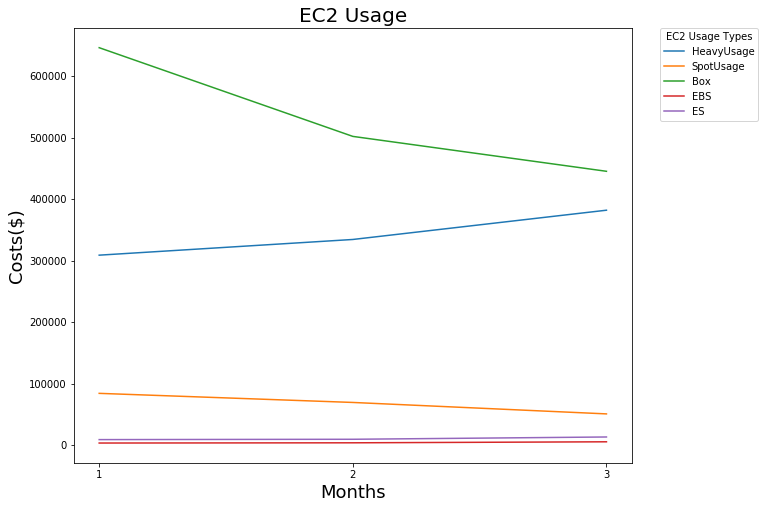

In [406]:
fig = plt.figure(figsize=(10,8))
ax=plt.gca()
ax.set_title("EC2 Usage", fontsize=20)
ax.set_ylabel("Costs($)", color='black', fontsize=18)
ax.set_xlabel("Months", color='black', fontsize=18)

regex = re.compile(r'Month\s+', flags=re.IGNORECASE)
df['Month'] = df['Month'].str.replace(regex,'')

cols = df.columns.values.tolist()
cols.pop(0)

colsList = []
colsLabels = []
for col in cols:
    df[col]= df[col].astype(float)
    plt.plot(df['Month'],df[col])
    colsList.append(df[col])
    colsLabels.append(col)

plt.legend(cols,title="EC2 Usage Types",bbox_to_anchor=(1.05,1),loc='upper left', borderaxespad=0)
plt.show()

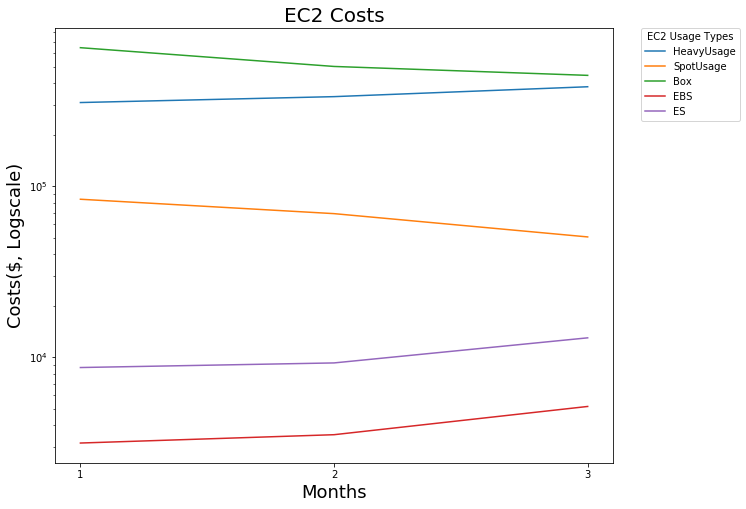

In [407]:
figLog = plt.figure(figsize=(10,8))
ax=plt.gca()
ax.set_title("EC2 Costs", fontsize=20)
ax.set_ylabel("Costs($, Logscale)", color='black', fontsize=18)
ax.set_xlabel("Months", color='black', fontsize=18)
ax.set_yscale('log')

for col in cols:
    plt.plot(df['Month'],df[col])

plt.legend(cols,title="EC2 Usage Types",bbox_to_anchor=(1.05,1),loc='upper left', borderaxespad=0)
plt.show()

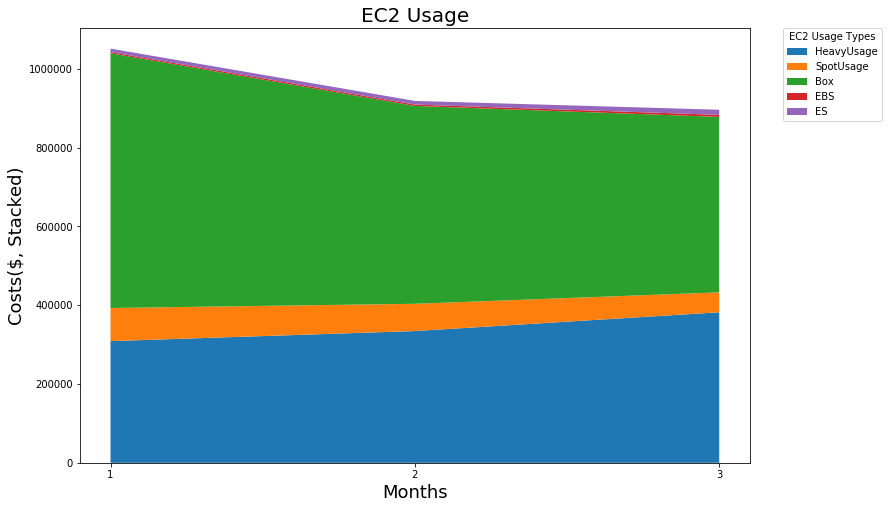

In [408]:
figArea = plt.figure(figsize=(12,8))
ax=plt.gca()
ax.set_title("EC2 Usage", fontsize=20)
ax.set_ylabel("Costs($, Stacked)", color='black', fontsize=18)
ax.set_xlabel("Months", color='black', fontsize=18)

plt.stackplot(df['Month'],colsList,labels=colsLabels)
plt.legend(loc='upper left',title='EC2 Usage Types',bbox_to_anchor=(1.05,1),borderaxespad=0)

In [413]:
df['Total'] = df[cols].sum(axis=1)
df['WeekAvg'] = df['Total']/4.35
df

,Month,HeavyUsage,SpotUsage,Box,EBS,ES,Total,WeekAvg
0,1,308797.468542,83980.381860,646344.069335,3150.944309,8709.544,1.050982e+06,241605.151275
1,2,334326.042326,69175.524800,502026.978250,3524.985412,9266.715,9.183202e+05,211108.102480
2,3,381938.499745,50557.230344,445250.378513,5156.312689,12991.276,8.958937e+05,205952.574090
